In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
dataku =  pd.read_csv('drive/MyDrive/data/Data_Mistery.csv')

In [ ]:
dataku

,usia,rating_efektifitas_hasil_vaksinasi,jenis_vaksin,jenis_vitamin_dan_herbal,pola_makan_teratur,terapi_plasma_darah,caring,suku,jk,kebangsaan,...,sulit_bernapas,sakit_teggorokan,demam,kelelahan,nyeri_sendi,lidah_tanpa_rasa,hidung_tanpa_bau,ada_radang_paru,avg_db_suara_nafas_dalam_3x,avg_db_suara_nafas_dangkal_3x
0,17,4.40,astrazeneca tipe 1,Vit. C,tidak,ya,tidak,dayak,laki-laki,WNA,...,ya,ya,tidak,tidak,ya,ya,tidak,tidak,32.650307,14.424617
1,82,2.55,pfizer,kayu india,ya,ya,tidak,minahasa,wanita,WNA,...,tidak,tidak,tidak,ya,tidak,ya,tidak,ya,39.553139,17.868317
2,93,2.28,astrazeneca tipe 1,NaN,tidak,ya,ya,sunda,laki-laki,WNA,...,ya,tidak,tidak,tidak,ya,ya,tidak,ya,36.081058,12.243417
3,49,3.14,nusantara,NaN,tidak,ya,ya,sunda,wanita,WNA,...,tidak,tidak,tidak,ya,tidak,ya,tidak,tidak,31.601793,17.321277
4,26,3.89,nusantara,kayu india,ya,ya,ya,melayu,laki-laki,WNI,...,ya,ya,ya,tidak,tidak,ya,ya,ya,39.771527,10.097403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,18,4.51,astrazeneca tipe 1,empon-empon,tidak,ya,tidak,asmat,laki-laki,WNI,...,tidak,ya,ya,tidak,tidak,tidak,tidak,ya,38.561551,10.479496
1999996,54,3.38,astrazeneca tipe 2,Vit. D,tidak,ya,tidak,melayu,wanita,WNI,...,ya,ya,tidak,tidak,ya,ya,ya,ya,30.651530,13.156249
1999997,11,4.52,pfizer,Vit. D,ya,ya,ya,dayak,laki-laki,WNA,...,ya,tidak,tidak,ya,ya,tidak,ya,ya,36.805216,11.941974
1999998,65,3.41,nusantara,Vit. B complex,tidak,tidak,tidak,minahasa,laki-laki,WNI,...,ya,ya,ya,ya,tidak,tidak,ya,ya,34.079041,11.947866


In [ ]:
# Mendeteksi kolom yang memiliki data NA
kolom_na = [kolom for kolom in dataku.columns if dataku[kolom].isnull().sum() > 0]
kolom_na

['jenis_vitamin_dan_herbal']

In [ ]:
#merubah NULL menjadi variabel kosong
dataku=dataku.replace('Null', np.nan)

In [ ]:
# Mendeteksi kolom yang memiliki data NA
kolom_na = [kolom for kolom in dataku.columns if dataku[kolom].isnull().sum() > 0]
kolom_na

['jenis_vitamin_dan_herbal', 'riwayat_kunjungan', 'hasil_tes_swab']

In [ ]:
#mendeteksi kolom NA kategori
kolom_na_kategori = [kolom for kolom in dataku.columns if 
                     dataku[kolom].isnull().sum() > 0 and
                     dataku[kolom].dtypes == 'O']
kolom_na_kategori

['jenis_vitamin_dan_herbal', 'riwayat_kunjungan', 'hasil_tes_swab']

In [ ]:
#analisis kolom kategori
kolom_kategori = [kolom for kolom in dataku.columns if dataku[kolom].dtypes == 'O'] #'O' adalah Pandas Object = string

# membuat data kolom_kategori
kategori = dataku[kolom_kategori]
kategori

,jenis_vaksin,jenis_vitamin_dan_herbal,pola_makan_teratur,terapi_plasma_darah,caring,suku,jk,kebangsaan,kota,riwayat_kunjungan,...,pakai_masker,komorbid_jantung,sulit_bernapas,sakit_teggorokan,demam,kelelahan,nyeri_sendi,lidah_tanpa_rasa,hidung_tanpa_bau,ada_radang_paru
0,astrazeneca tipe 1,Vit. C,tidak,ya,tidak,dayak,laki-laki,WNA,samarinda,pernah keluar kota,...,ya,ya,ya,ya,tidak,tidak,ya,ya,tidak,tidak
1,pfizer,kayu india,ya,ya,tidak,minahasa,wanita,WNA,sidoarjo,pernah keluar negeri,...,tidak,tidak,tidak,tidak,tidak,ya,tidak,ya,tidak,ya
2,astrazeneca tipe 1,NaN,tidak,ya,ya,sunda,laki-laki,WNA,jogja,pernah keluar negeri,...,ya,tidak,ya,tidak,tidak,tidak,ya,ya,tidak,ya
3,nusantara,NaN,tidak,ya,ya,sunda,wanita,WNA,sidoarjo,selalu di rumah,...,ya,ya,tidak,tidak,tidak,ya,tidak,ya,tidak,tidak
4,nusantara,kayu india,ya,ya,ya,melayu,laki-laki,WNI,bangkalan,NaN,...,tidak,ya,ya,ya,ya,tidak,tidak,ya,ya,ya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,astrazeneca tipe 1,empon-empon,tidak,ya,tidak,asmat,laki-laki,WNI,lamongan,NaN,...,ya,tidak,tidak,ya,ya,tidak,tidak,tidak,tidak,ya
1999996,astrazeneca tipe 2,Vit. D,tidak,ya,tidak,melayu,wanita,WNI,surabaya,NaN,...,ya,tidak,ya,ya,tidak,tidak,ya,ya,ya,ya
1999997,pfizer,Vit. D,ya,ya,ya,dayak,laki-laki,WNA,sumenep,pernah keluar kota,...,tidak,tidak,ya,tidak,tidak,ya,ya,tidak,ya,ya
1999998,nusantara,Vit. B complex,tidak,tidak,tidak,minahasa,laki-laki,WNI,bangkalan,pernah keluar negeri,...,tidak,tidak,ya,ya,ya,ya,tidak,tidak,ya,ya


In [ ]:
#melihat variabel unik pada kolom kategori
kategori.nunique()


jenis_vaksin                 5
jenis_vitamin_dan_herbal     7
pola_makan_teratur           2
terapi_plasma_darah          2
caring                       2
suku                        10
jk                           2
kebangsaan                   2
kota                        14
riwayat_kunjungan            3
pernah_kena_covid            2
punya_asma                   2
sering_batuk                 2
perokok                      2
hasil_tes_swab               3
ada_hipertensi               2
flu                          2
komorbid_diabet              2
diare                        2
pakai_masker                 2
komorbid_jantung             2
sulit_bernapas               2
sakit_teggorokan             2
demam                        2
kelelahan                    2
nyeri_sendi                  2
lidah_tanpa_rasa             2
hidung_tanpa_bau             2
ada_radang_paru              2
dtype: int64

# 1.pada kasus ini otput yang di hasilkan berupa efektivitas vaksinasi
# 2.akan di cari korelasi antara efektivitas vaksinasi dengan kolom kategori yang ada 

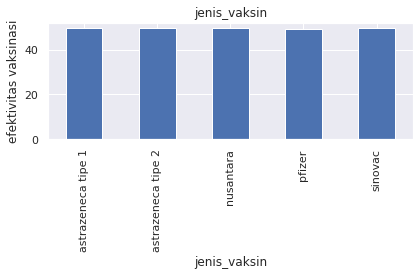

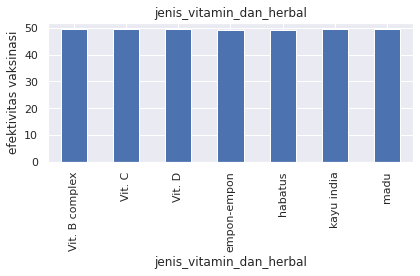

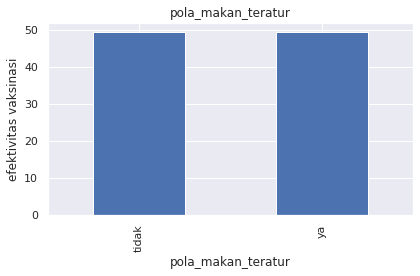

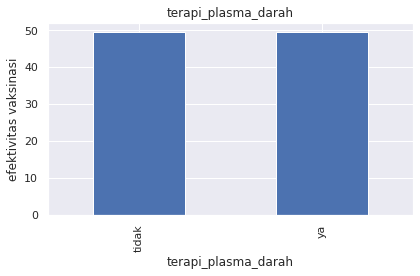

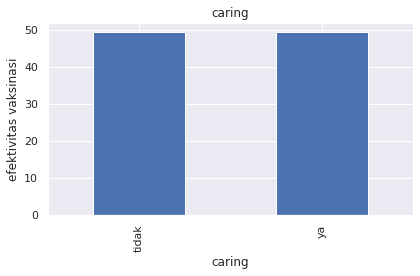

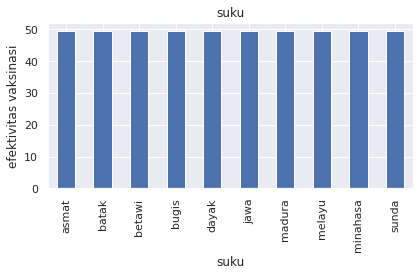

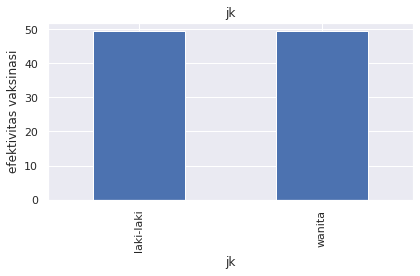

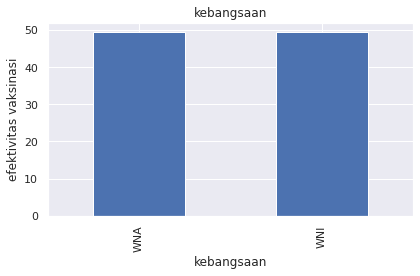

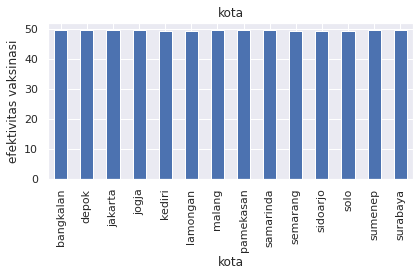

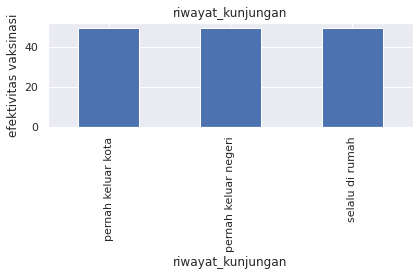

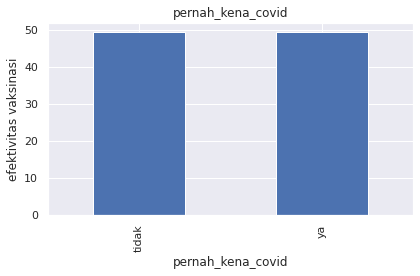

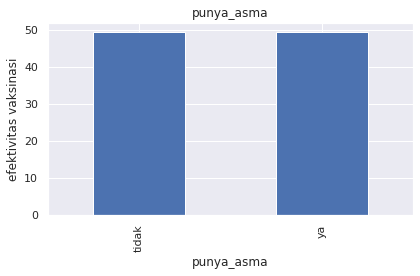

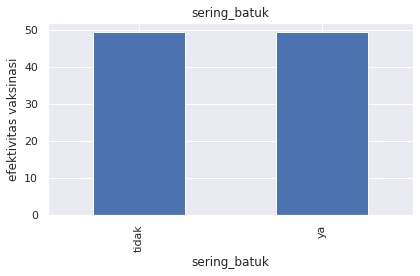

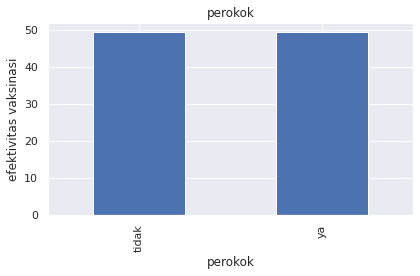

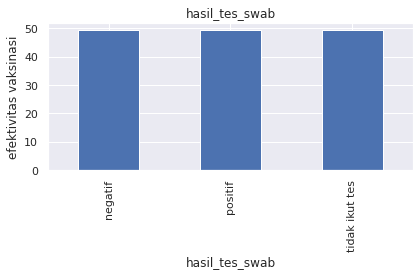

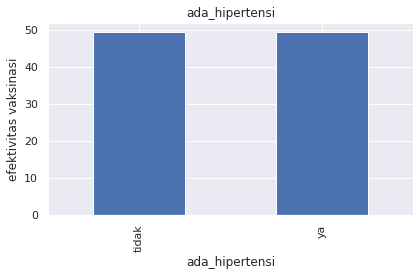

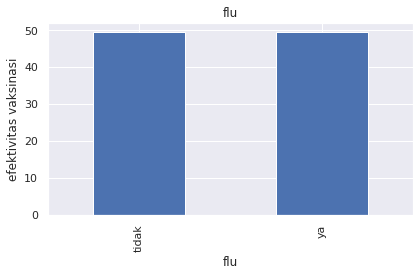

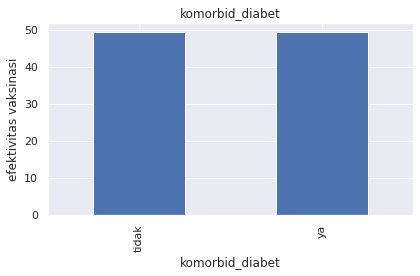

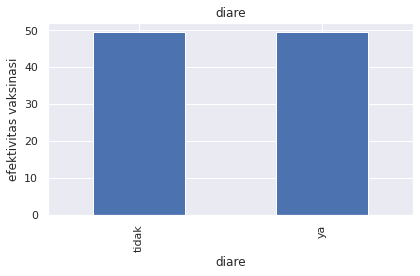

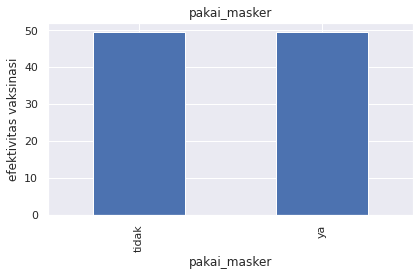

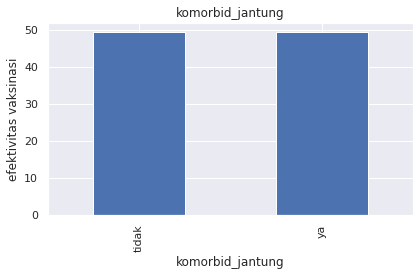

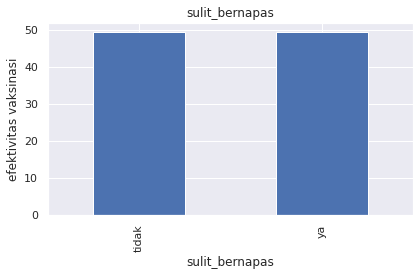

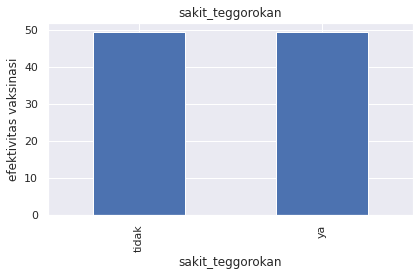

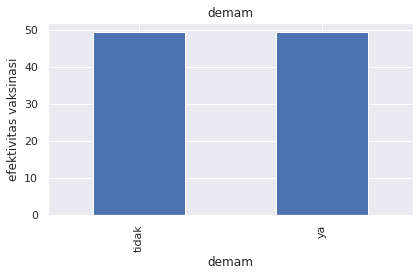

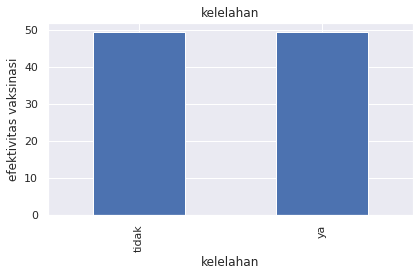

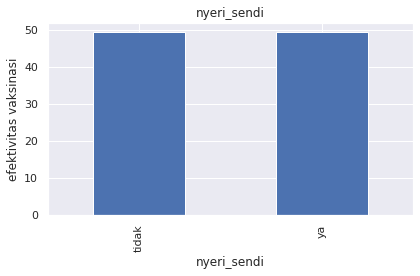

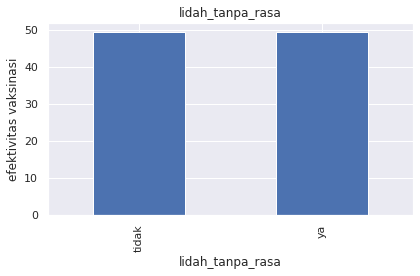

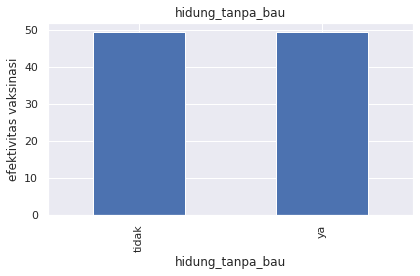

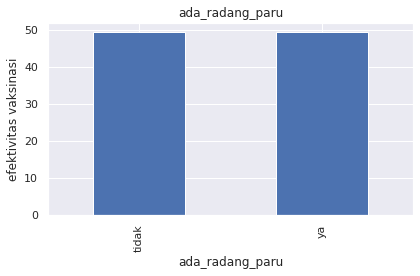

In [ ]:
# Analisis data kategori dnegan efektifitas vaksinasi
def analisis_data_kategori(data, col):
    data = data.copy()
    data.groupby(col)['usia'].mean().plot.bar()
    plt.title(col)
    plt.ylabel('efektivitas vaksinasi')
    plt.tight_layout()
    plt.show()

# Membuat for loop untuk plotting kolom_kategori
batas = len(kolom_kategori)
i = 1
for kolom in kolom_kategori:
    i+=1
    analisis_data_kategori(dataku, kolom)
    if i <= batas: plt.figure() 

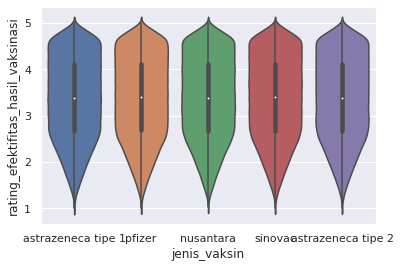

In [ ]:
sns.violinplot(x='jenis_vaksin', y='rating_efektifitas_hasil_vaksinasi', data=dataku)

In [ ]:
# menganalisis kolom numerik
# membuat visualisasi dengan plot matriks
dataku.corr()

,usia,rating_efektifitas_hasil_vaksinasi,avg_db_suara_nafas_dalam_3x,avg_db_suara_nafas_dangkal_3x
usia,1.000000,-0.954508,-0.000829,-0.000101
rating_efektifitas_hasil_vaksinasi,-0.954508,1.000000,0.000791,-0.000002
avg_db_suara_nafas_dalam_3x,-0.000829,0.000791,1.000000,-0.000726
avg_db_suara_nafas_dangkal_3x,-0.000101,-0.000002,-0.000726,1.000000


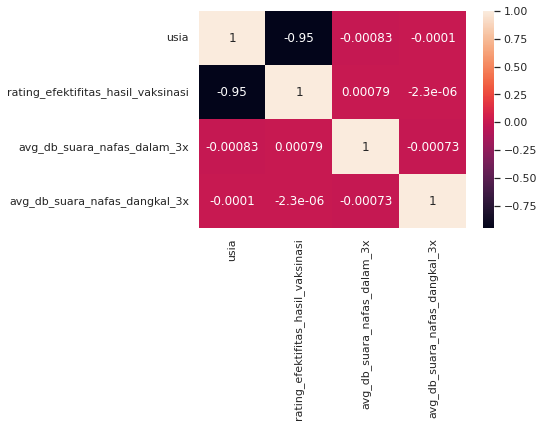

In [ ]:
sns.heatmap(dataku.corr(), annot=True)

In [ ]:
kolom_numerik = [kolom for kolom in dataku.columns if dataku[kolom].dtypes != 'O'] #'O' adalah Pandas Object = string

# Visualisasi data kolom_numerik
numerik = dataku[kolom_numerik]
numerik

,usia,rating_efektifitas_hasil_vaksinasi,avg_db_suara_nafas_dalam_3x,avg_db_suara_nafas_dangkal_3x
0,17,4.40,32.650307,14.424617
1,82,2.55,39.553139,17.868317
2,93,2.28,36.081058,12.243417
3,49,3.14,31.601793,17.321277
4,26,3.89,39.771527,10.097403
...,...,...,...,...
1999995,18,4.51,38.561551,10.479496
1999996,54,3.38,30.651530,13.156249
1999997,11,4.52,36.805216,11.941974
1999998,65,3.41,34.079041,11.947866


In [ ]:
# Menghitung persentase dari data kategori yang kosong
dataku[kolom_na_kategori].isnull().mean()*100


jenis_vitamin_dan_herbal    12.45120
riwayat_kunjungan           25.04660
hasil_tes_swab              24.97955
dtype: float64

In [ ]:
# Menganalisis kolom-kolom numerik
kolom_numerik = [kolom for kolom in dataku.columns if dataku[kolom].dtypes != 'O'] #'O' adalah Pandas Object = string

# Membuat data kolom_numerik
numerik = dataku[kolom_numerik]
numerik

,usia,rating_efektifitas_hasil_vaksinasi,avg_db_suara_nafas_dalam_3x,avg_db_suara_nafas_dangkal_3x
0,17,4.40,32.650307,14.424617
1,82,2.55,39.553139,17.868317
2,93,2.28,36.081058,12.243417
3,49,3.14,31.601793,17.321277
4,26,3.89,39.771527,10.097403
...,...,...,...,...
1999995,18,4.51,38.561551,10.479496
1999996,54,3.38,30.651530,13.156249
1999997,11,4.52,36.805216,11.941974
1999998,65,3.41,34.079041,11.947866


In [ ]:
#menganalisis data numerik
diskrit = dataku[kolom_numerik]
diskrit

,usia,rating_efektifitas_hasil_vaksinasi,avg_db_suara_nafas_dalam_3x,avg_db_suara_nafas_dangkal_3x
0,17,4.40,32.650307,14.424617
1,82,2.55,39.553139,17.868317
2,93,2.28,36.081058,12.243417
3,49,3.14,31.601793,17.321277
4,26,3.89,39.771527,10.097403
...,...,...,...,...
1999995,18,4.51,38.561551,10.479496
1999996,54,3.38,30.651530,13.156249
1999997,11,4.52,36.805216,11.941974
1999998,65,3.41,34.079041,11.947866


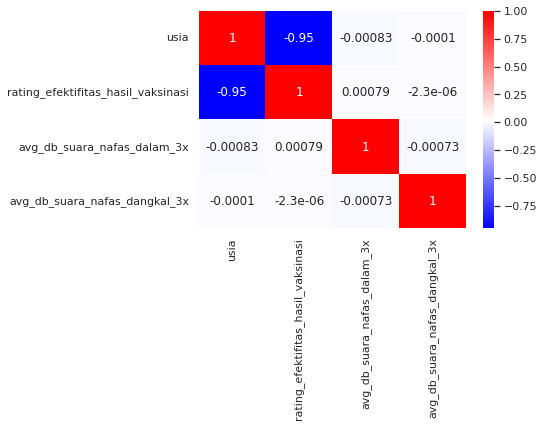

In [ ]:
sns.heatmap(dataku[['usia',
 'rating_efektifitas_hasil_vaksinasi',
 'avg_db_suara_nafas_dalam_3x',
 'avg_db_suara_nafas_dangkal_3x','perokok']].corr(), annot=True, cmap='bwr')
 

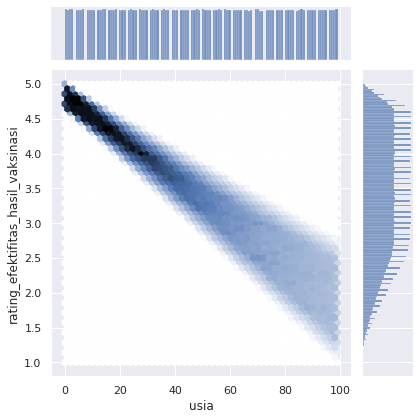

In [ ]:
sns.jointplot(x='usia', y='rating_efektifitas_hasil_vaksinasi', kind='hex', data=dataku)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataku, dataku['rating_efektifitas_hasil_vaksinasi'], 
                                                    test_size = 0.1,
                                                    random_state = 10)

In [6]:
# Mengatasi data kosong untuk tipe data kategori
kolom_na_kategori = [kolom for kolom in dataku.columns if 
                     dataku[kolom].isnull().sum() > 0 and
                     dataku[kolom].dtypes == 'O']

# Menghitung persentase dari data kategori yang kosong
dataku[kolom_na_kategori].isnull().mean()*100

# Mengganti data kosong untuk tipe kategori dengan kategori 'Kosong'
X_train[kolom_na_kategori] = X_train[kolom_na_kategori].fillna('Kosong')
X_test[kolom_na_kategori] = X_test[kolom_na_kategori].fillna('Kosong')

In [8]:
# Memastikan tidak ada data kosong untuk tipe kategori di traning set
X_train[kolom_na_kategori].isnull().sum()

# Memastikan tidak ada data kosong untuk tipe kategori di test set
X_test[kolom_na_kategori].isnull().sum()


jenis_vitamin_dan_herbal    0
dtype: int64

In [9]:
# Mengatasi variabel jarang
# Data kategori
kolom_kategori = [kolom for kolom in X_train.columns if X_train[kolom].dtypes == 'O']
# Membuat fungsi untuk variabel jarang
def analisis_var_jarang(data, col, persentase):
    data = data.copy()
    # Menentukan persentase setiap kategori
    isi = data.groupby(col)['rating_efektifitas_hasil_vaksinasi'].count() / len(data)
    return isi[isi < persentase].index

for kolom in kolom_kategori:
    # Mencari kategori yang jarang
    var_jarang = analisis_var_jarang(X_train, kolom, 0.01)
    # Mengganti nama item baris dnegan kata 'Jarang'
    X_train[kolom] = np.where(X_train[kolom].isin(var_jarang), 'Jarang', X_train[kolom])
    X_test[kolom] = np.where(X_test[kolom].isin(var_jarang), 'Jarang', X_test[kolom])


In [10]:
# Mengganti (encode) tipe data kategori menjadi tipe data numerik
def encode_kategori(train, test, kolom, target):
    # Mengurutkan kategori mulai dari kecil ke besar berdasarkan nilai rataan evektifitas vaksin
    data_urut = train.groupby([kolom])[target].mean().sort_values().index
    # Membuat dictionary dan enumerate untuk emndapatkan indeks dan urutannya
    data_ordinal = {k: i for i, k in enumerate(data_urut, start=0)}
    # Menggunakan dictionary di atas untuk mengganti data kategori menjadi integer
    train[kolom] = train[kolom].map(data_ordinal)
    test[kolom] = test[kolom].map(data_ordinal)
    print(kolom, data_ordinal)

# For loop untuk merubah data kategori menjadi integer
for kolom in kolom_kategori:
    encode_kategori(X_train, X_test, kolom, 'rating_efektifitas_hasil_vaksinasi')

jenis_vaksin {'nusantara': 0, 'astrazeneca tipe 1': 1, 'astrazeneca tipe 2': 2, 'pfizer': 3, 'sinovac': 4}
jenis_vitamin_dan_herbal {'madu': 0, 'kayu india': 1, 'Vit. D': 2, 'Vit. C': 3, 'Vit. B complex': 4, 'Kosong': 5, 'habatus': 6, 'empon-empon': 7}
pola_makan_teratur {'tidak': 0, 'ya': 1}
terapi_plasma_darah {'tidak': 0, 'ya': 1}
caring {'ya': 0, 'tidak': 1}
suku {'bugis': 0, 'betawi': 1, 'sunda': 2, 'jawa': 3, 'asmat': 4, 'madura': 5, 'batak': 6, 'dayak': 7, 'minahasa': 8, 'melayu': 9}
jk {'wanita': 0, 'laki-laki': 1}
kebangsaan {'WNA': 0, 'WNI': 1}
kota {'pamekasan': 0, 'jogja': 1, 'lamongan': 2, 'malang': 3, 'bangkalan': 4, 'jakarta': 5, 'sumenep': 6, 'surabaya': 7, 'depok': 8, 'samarinda': 9, 'kediri': 10, 'solo': 11, 'semarang': 12, 'sidoarjo': 13}
riwayat_kunjungan {'Null': 0, 'pernah keluar negeri': 1, 'selalu di rumah': 2, 'pernah keluar kota': 3}
pernah_kena_covid {'tidak': 0, 'ya': 1}
punya_asma {'ya': 0, 'tidak': 1}
sering_batuk {'ya': 0, 'tidak': 1}
perokok {'tidak': 0,

In [11]:
# Mengecek NA untuk training dan test set
X_train.isnull().sum()
train_kosong = [kolom for kolom in X_train.columns if X_train[kolom].isnull().sum() > 0]
X_test.isnull().sum()
test_kosong = [kolom for kolom in X_test.columns if X_test[kolom].isnull().sum() > 0]

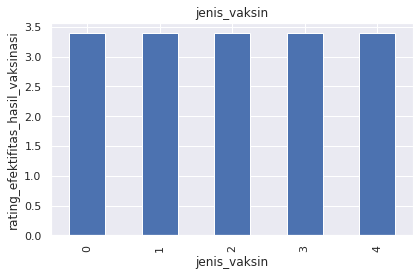

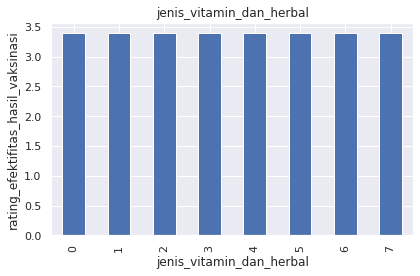

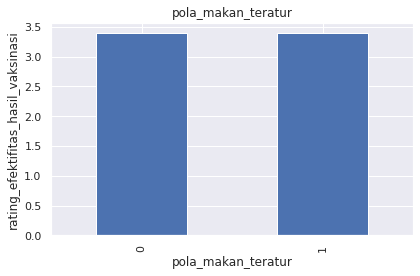

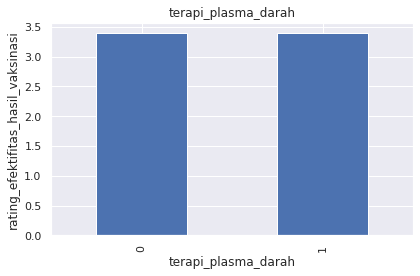

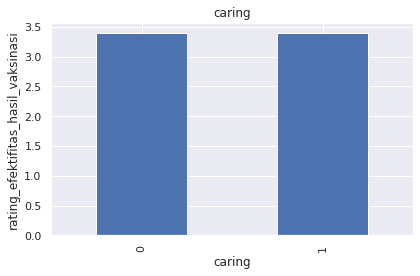

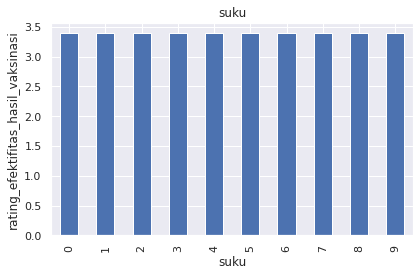

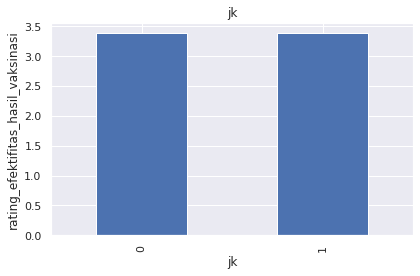

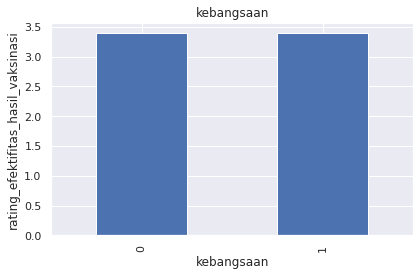

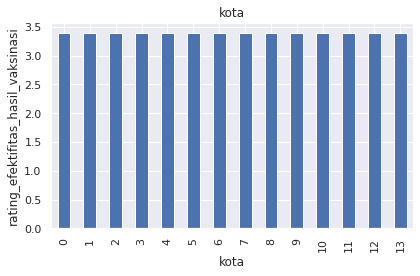

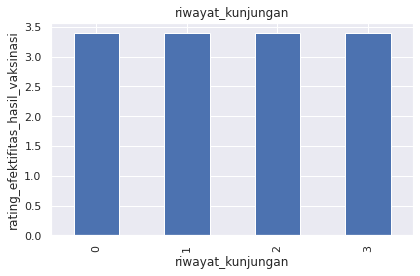

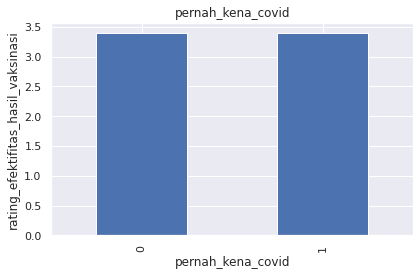

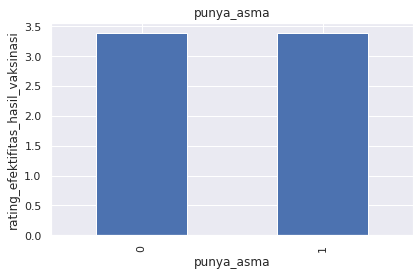

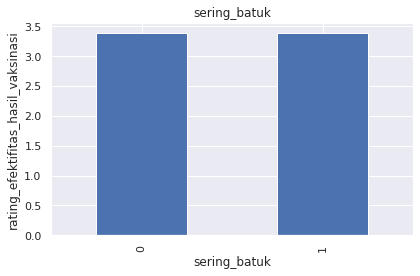

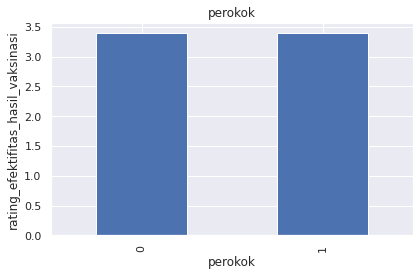

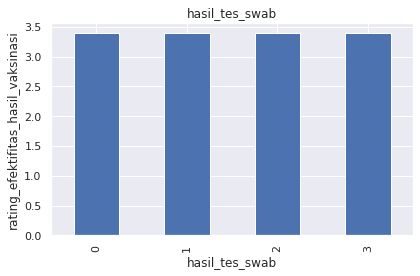

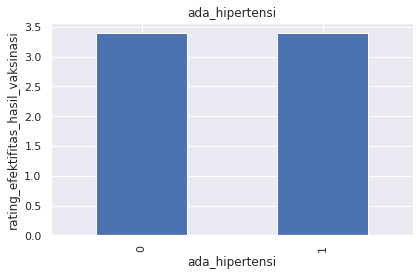

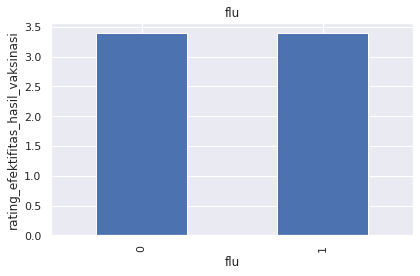

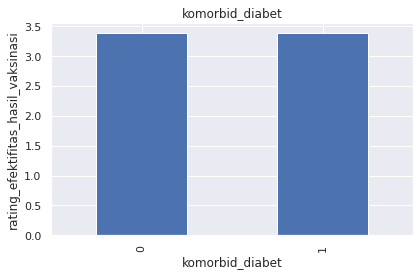

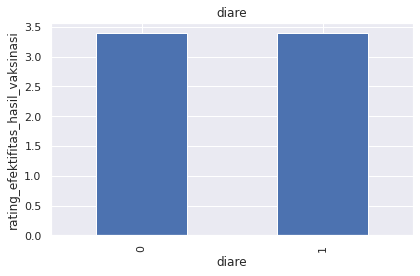

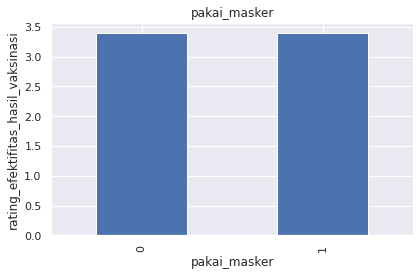

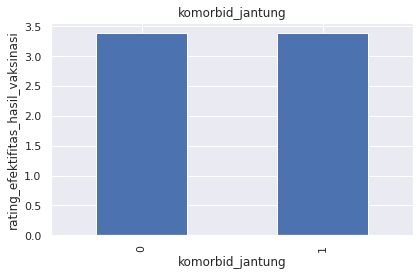

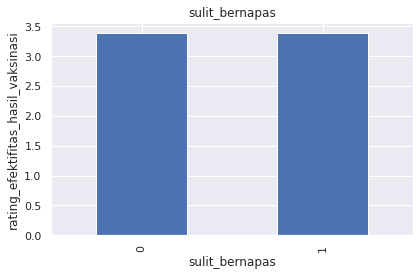

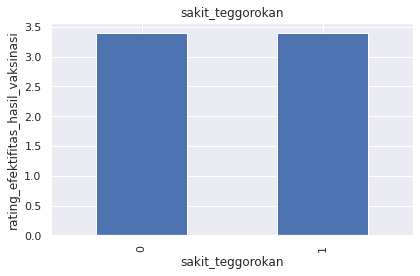

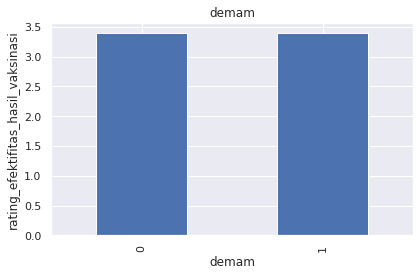

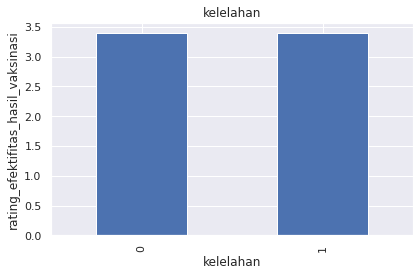

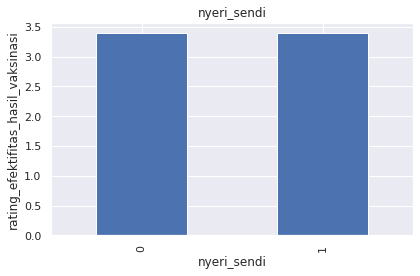

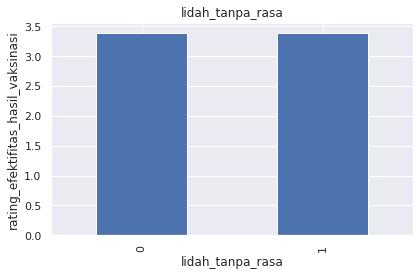

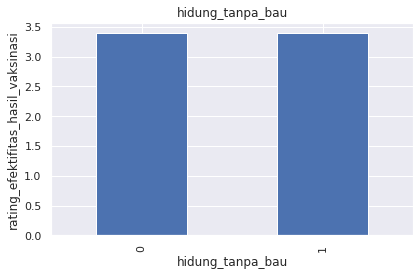

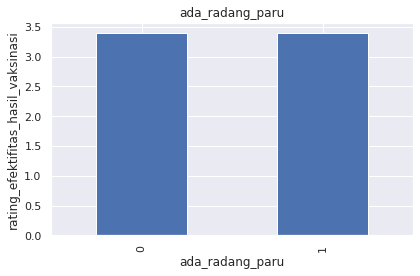

In [12]:
# Mengisi kolom numerik dengan modus di test set
for kolom in test_kosong:
    # Menghitung modus
    hitung_modus = X_test[kolom].mode()[0] # [0] adalah untuk mengeluarkan indeksnya
    # Menambahkan kolom baru mendeteksi data kosong per barisnya
    X_test[kolom+'_na'] = np.where(X_test[kolom].isnull(), 1, 0)
    # Memasukkan modus ke baris yang kosong
    X_test[kolom] = X_test[kolom].fillna(hitung_modus)

# Melihat plot untuk semua kolom kategori
def analisis_kategori(data, col):
    data = data.copy()
    data.groupby(col)['rating_efektifitas_hasil_vaksinasi'].median().plot.bar()
    plt.title(col)
    plt.ylabel('rating_efektifitas_hasil_vaksinasi')
    plt.tight_layout()
    plt.show()

batas = len(kolom_kategori)
i = 1
for kolom in kolom_kategori:
    i += 1
    analisis_kategori(X_train, kolom)
    if i <= batas: plt.figure()

**Feature Selection**

In [1]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [13]:
# Menyimpan X_train dan X_test dalam file csv
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

In [14]:
# Mengimpor dataset
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')


In [ ]:
# Variabel dependen
y_train = X_train['rating_efektifitas_hasil_vaksinasi']
y_test = X_test['rating_efektifitas_hasil_vaksinasi']

In [ ]:
# Membuang kolom yang tidak perlu (rating_efektifitas_hasil_vaksinasi)
X_train.drop(['rating_efektifitas_hasil_vaksinasi'], axis = 1, inplace = True)
X_test.drop(['rating_efektifitas_hasil_vaksinasi'], axis = 1, inplace = True)

In [15]:
pilih = SelectFromModel(Lasso(alpha=0.005, random_state=10))

In [16]:
pilih.fit(X_train,y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=10))

In [ ]:
# Melihat kolom (variabel) mana saja yang dipilih (True)
pilih.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [17]:
# Membuat list kolom apa saja yang dipilih
pilihan_kolom = X_train.columns[(pilih.get_support())]

In [18]:
fitur=dataku[pilihan_kolom]
fitur

,usia,rating_efektifitas_hasil_vaksinasi
0,17,4.40
1,82,2.55
2,93,2.28
3,49,3.14
4,26,3.89
...,...,...
1999995,18,4.51
1999996,54,3.38
1999997,11,4.52
1999998,65,3.41


In [ ]:
# Mencetak beberapa statistik ringkasan
print('Jumlah kolom awal: {}'.format((X_train.shape[1])))
print('Jumlah kolom terpilih: {}'.format(len(pilihan_kolom)))
print('Kolom yang tak terpilih: {}'.format(np.sum(pilih.estimator_.coef_ == 0)))

Jumlah kolom awal: 32
Jumlah kolom terpilih: 1
Kolom yang tak terpilih: 31


**melatih model**

In [ ]:
# Mengonversi fitur piluhan menjadi format csv
pd.Series(pilihan_kolom).to_csv('fitur_pilihan.csv', index=False)

In [ ]:
coba = pd.read_csv('fitur_pilihan.csv')
coba

,0
0,usia


In [ ]:
# Mengurangi training dan test set sesuai list features
X_train = X_train[pilihan_kolom]
X_test = X_test[pilihan_kolom]

In [ ]:

# Menyiapkan model
model_linear = Lasso(alpha=0.005, random_state=10)


In [ ]:
# Training model
model_linear.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=10)

In [ ]:
# Memprediksi model
pred_train = model_linear.predict(X_train)
pred_test = model_linear.predict(X_test)

In [ ]:
# Library untuk mengevaluasi model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
skor1=model_linear.score(X_test, y_test)
skor1

0.911109800634383

train mse: 0.07
train rmse: 0.26
train r2: 0.91

test mse: 0.07
test rmse: 0.26
test r2: 0.91

Rataan efektivitas vaksin test set:  3
Rataan prediksi efektivitas vaksin:  3


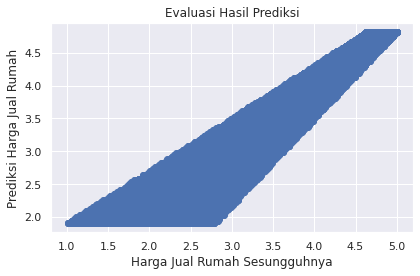

In [ ]:
# Menentukan mse (mean squared error) dan rmse (root mean squared error)
print('train mse: {:.2f}'.format(mean_squared_error(y_train,pred_train)))
print('train rmse: {:.2f}'.format(mean_squared_error(y_train, pred_train, squared=False)))
print('train r2: {:.2f}'.format(r2_score(y_train,pred_train)))
print()
print('test mse: {:.2f}'.format(mean_squared_error(y_test, pred_test)))
print('test rmse: {:.2f}'.format(mean_squared_error(y_test,pred_test, squared=False)))
print('test r2: {:.2f}'.format(r2_score(y_test,pred_test)))
print()
print('Rataan efektivitas vaksin test set: ', int((y_test).mean()))
print('Rataan prediksi efektivitas vaksin: ', int((pred_test).mean()))

# Evaluasi hasil prediksi modle kita dengan data sesungguhnya
plt.scatter(y_test, pred_test)
plt.xlabel('efektivitas vaksinai Sesungguhnya')
plt.ylabel('Prediksi efektivitas vaksinasi')
plt.title('Evaluasi Hasil Prediksi')
plt.tight_layout()